<a href="https://colab.research.google.com/github/suryagokul/Deep-Learning/blob/main/Transfer_Learning_VGG16_and_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Transfer Learning?

`Transfer learning is the reuse of a pre-trained model on a new problem. It's currently very popular in deep learning because it can train deep neural networks with comparatively little data. This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models. `

`In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the knowledge that the model gained during its training to recognize other objects like sunglasses.`




In [90]:
!pip install html-table-parser-python3

In [120]:
# Library for opening url and creating 
# requests 
import urllib.request 

# for parsing all the tables present 
# on the website 
from html_table_parser import HTMLTableParser 

# for converting the parsed data in a 
# pandas dataframe 
import pandas as pd 


# Opens a website and read its 
# binary contents (HTTP Response Body) 
def url_get_contents(url): 

	# Opens a website and read its 
	# binary contents (HTTP Response Body) 

	#making request to the website 
	req = urllib.request.Request(url=url) 
	f = urllib.request.urlopen(req) 

	#reading contents of the website 
	return f.read() 

# defining the html contents of a URL. 
xhtml = url_get_contents('https://keras.io/api/applications/').decode('utf-8') 

# Defining the HTMLTableParser object 
p = HTMLTableParser() 

# feeding the html contents in the 
# HTMLTableParser object 
p.feed(xhtml) 

keras_models = pd.DataFrame(p.tables)

data = [keras_models.loc[0,i] for i in range(27)]

In [130]:
from prettytable import PrettyTable

t = PrettyTable(data[0])

t.add_rows(data[1:])

In [140]:
print("--------------------------Available Transfer Learning Models----------------------\n")
print(t)

--------------------------Available Transfer Learning Models----------------------

+-------------------+--------+----------------+----------------+-------------+-------+
|       Model       |  Size  | Top-1 Accuracy | Top-5 Accuracy |  Parameters | Depth |
+-------------------+--------+----------------+----------------+-------------+-------+
|      Xception     | 88 MB  |     0.790      |     0.945      |  22,910,480 |  126  |
|       VGG16       | 528 MB |     0.713      |     0.901      | 138,357,544 |   23  |
|       VGG19       | 549 MB |     0.713      |     0.900      | 143,667,240 |   26  |
|      ResNet50     | 98 MB  |     0.749      |     0.921      |  25,636,712 |   -   |
|     ResNet101     | 171 MB |     0.764      |     0.928      |  44,707,176 |   -   |
|     ResNet152     | 232 MB |     0.766      |     0.931      |  60,419,944 |   -   |
|     ResNet50V2    | 98 MB  |     0.760      |     0.930      |  25,613,800 |   -   |
|    ResNet101V2    | 171 MB |     0.772      

### Transfer Learning VGG 16 using Keras

Please download the dataset from the below url

https://www.kaggle.com/rahul897/catsdogs

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.37.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.370.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3700.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3701.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3702.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3703.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3704.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3705.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3706.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3707.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/cats/cat.3708.jpg  
  inflating: Convolutional_N

In [8]:
!ls

Convolutional_Neural_Networks  drive  sample_data


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#Give dataset path
train_path = '/content/Convolutional_Neural_Networks/dataset/training_set'
valid_path = '/content/Convolutional_Neural_Networks/dataset/test_set'

`Here weights are used as same as weights used in Imagenet Competition and we set include_top to false because we don't need to use pretrained input layers,flatten,dense and output layers.We are customizing inputs and based on inputs customizing outputs also,So,they aren't predefined.`

`input_shape is [224,224,3] 3 is nothing but rgb channel.`

In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 0s 0us/step


In [11]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

`In Python, the glob module is used to retrieve files/pathnames matching a specified pattern`

In [12]:
  # useful for getting number of output classes
folders = glob('/content/Convolutional_Neural_Networks/dataset/training_set/*')

print(len(folders))

2


In [13]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


`Use the Image Data Generator to generate new features of image.It is also known as Data Augmentation`

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

**Data Augmentation**

`We can also use these features to generate new images or different types of data.`

  `rotation_range=40`

  `width_shift_range=0.2`

  `height_shift_range=0.2`

  `shear_range=0.2`

  `zoom_range=0.2`

  `horizontal_flip=True`

  `fill_mode=nearest`

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/Convolutional_Neural_Networks/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(                                        # we can also use fit instead of fit_generator
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
250/250 [==============================] - 120s 447ms/step - loss: 0.4807 - accuracy: 0.8033 - val_loss: 0.2676 - val_accuracy: 0.8880
Epoch 2/50
250/250 [==============================] - 109s 437ms/step - loss: 0.2172 - accuracy: 0.9101 - val_loss: 0.2138 - val_accuracy: 0.9185
Epoch 3/50
250/250 [==============================] - 109s 437ms/step - loss: 0.1612 - accuracy: 0.9335 - val_loss: 0.2387 - val_accuracy: 0.9190
Epoch 4/50
250/250 [==============================] - 109s 434ms/step - loss: 0.1633 - accuracy: 0.9334 - val_loss: 0.1938 - val_accuracy: 0.9285
Epoch 5/50
250/250 [==============================] - 109s 434ms/step - loss: 0.1546 - accuracy: 0.9372 - val_loss: 0.1912 - val_accuracy: 0.9360
Epoch 6/50
250/250 [==============================] - 108s 433ms/step - loss: 0.1304 - accuracy: 0.9465 - val_loss: 0.2029 - val_accuracy: 0.9320
Epoch 7/50
250/250 [==============================] - 107s 430ms/step - loss: 0.1204 - accuracy: 0.9555 - val_loss: 0.3410 -

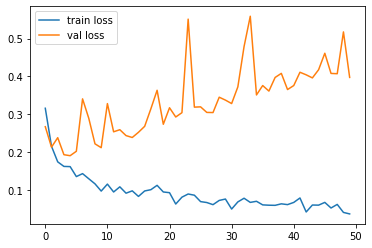

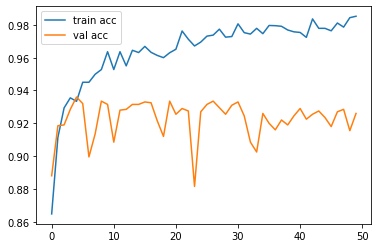

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[9.9998677e-01, 1.3207246e-05],
       [2.0487790e-03, 9.9795121e-01],
       [4.0762469e-02, 9.5923752e-01],
       ...,
       [2.2101655e-16, 1.0000000e+00],
       [9.9798846e-01, 2.0115031e-03],
       [1.0000000e+00, 5.5317675e-13]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)          # getting index i.e either 0 or 1 of value having highest probaility.

In [26]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

**Single Image Prediction**

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_vgg16.h5')

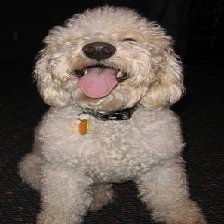

In [44]:
x = image.load_img('/content/Convolutional_Neural_Networks/dataset/test_set/dogs/dog.4003.jpg',target_size=(224,224))


x

`It is dog.Let's see what our model will predict?Whether model predicts correctly or not?Wait and See`

In [45]:
test_image = image.img_to_array(x)         # Converting image to array
 
test_image = test_image/255                # Normalizing or rescaling the image

# Before expanding dimensions shape of test_image is (224,224,3)

test_image = np.expand_dims(test_image,axis=0)          # But we are predicting only one image,so we have to expand dims.Then shape is (1, 224, 224, 3) 

result = model.predict(test_image)


In [88]:
test_image.shape

(1, 224, 224, 3)

In [46]:
result                 # Because of using activation function as softmax it gives two probabilities.

array([[1.345633e-13, 1.000000e+00]], dtype=float32)

In [78]:
print("%f" %float("1.345633e-13"))             # Formatting exponentials 

0.000000


In [79]:
print("%f" %float("1.000000e+00"))

1.000000


In [81]:
a=np.argmax(result, axis=1)             # getting index i.e either 0 (cat) or 1(dog) of value having highest probaility

In [83]:
if a==0:
  print("Image classified is cat")
else:
   print("Image classified is dog")

Image classified is dog


`We are done!!! Our model predicts absolutely accuracte predictions...
Let's Try with vgg19,alexnet,lenet,inception...`

### Transfer Learning Vgg19 using keras

In [151]:
from tensorflow.keras.applications.vgg19 import VGG19

In [152]:
IMAGE_SIZE = [224,224]

In [153]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [154]:
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [157]:
# our layers - you can add more if you want
y = Flatten()(VGG19.output)

In [158]:
prediction = Dense(len(folders), activation='softmax')(y)

# create a model object
model_vgg19 = Model(inputs=VGG19.input, outputs=prediction)

In [159]:

# view the structure of the model
model_vgg19.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [160]:
# tell the model what cost and optimization method to use
model_vgg19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [161]:
# fit the model
# Run the cell. It will take some time to execute
r = model_vgg19.fit_generator(                                        # we can also use fit instead of fit_generator
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
250/250 [==============================] - 115s 458ms/step - loss: 0.5029 - accuracy: 0.7862 - val_loss: 0.3080 - val_accuracy: 0.8755
Epoch 2/50
250/250 [==============================] - 116s 463ms/step - loss: 0.2839 - accuracy: 0.8842 - val_loss: 0.2198 - val_accuracy: 0.9105
Epoch 3/50
250/250 [==============================] - 117s 467ms/step - loss: 0.2189 - accuracy: 0.9058 - val_loss: 0.3244 - val_accuracy: 0.8800
Epoch 4/50
250/250 [==============================] - 117s 469ms/step - loss: 0.2164 - accuracy: 0.9142 - val_loss: 0.2411 - val_accuracy: 0.9070
Epoch 5/50
250/250 [==============================] - 118s 472ms/step - loss: 0.1873 - accuracy: 0.9264 - val_loss: 0.2333 - val_accuracy: 0.9165
Epoch 6/50
250/250 [==============================] - 118s 474ms/step - loss: 0.1744 - accuracy: 0.9322 - val_loss: 0.2435 - val_accuracy: 0.9160
Epoch 7/50
250/250 [==============================] - 118s 473ms/step - loss: 0.1600 - accuracy: 0.9379 - val_loss: 0.2684 -

In [162]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model_vgg19.save('model_vgg19.h5')

In [163]:
y_pred = model_vgg19.predict(test_set)

In [164]:
y_pred

array([[6.9914937e-01, 3.0085069e-01],
       [1.0000000e+00, 1.8350905e-15],
       [2.4153487e-11, 1.0000000e+00],
       ...,
       [7.7649598e-23, 1.0000000e+00],
       [1.6759026e-07, 9.9999988e-01],
       [1.1494314e-02, 9.8850572e-01]], dtype=float32)

In [165]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)          # getting index i.e either 0 or 1 of value having highest probaility.

In [166]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

**Single Image Prediction**

In [167]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [168]:
model=load_model('model_vgg19.h5')

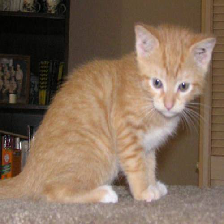

In [169]:
x = image.load_img('/content/Convolutional_Neural_Networks/dataset/test_set/cats/cat.4003.jpg',target_size=(224,224))


x

`It is cat.Let's see what our model will predict?Whether model predicts correctly or not?Wait and See`

In [170]:
test_image = image.img_to_array(x)         # Converting image to array
 
test_image = test_image/255                # Normalizing or rescaling the image

# Before expanding dimensions shape of test_image is (224,224,3)

test_image = np.expand_dims(test_image,axis=0)          # But we are predicting only one image,so we have to expand dims.Then shape is (1, 224, 224, 3) 

result = model_vgg19.predict(test_image)


In [171]:
test_image.shape

(1, 224, 224, 3)

In [172]:
result                 # Because of using activation function as softmax it gives two probabilities.

array([[1.00000000e+00, 1.22929176e-11]], dtype=float32)

In [181]:
print("%f" %float(result[0][0]))             # Formatting exponentials 

1.000000


In [182]:
print("%f" %float(result[0][1]))

0.000000


In [185]:
a=np.argmax(result, axis=1)             # getting index i.e either 0 (cat) or 1(dog) of value having highest probaility

a

array([0])

In [184]:
if a==0:
  print("Image classified is cat")
else:
   print("Image classified is dog")

Image classified is cat
